In [2]:
import pandas as pd

In [ ]:
circuits = pd.read_csv("data_raw/circuits.csv")
drivers = pd.read_csv("data_raw/drivers.csv")
races = pd.read_csv("data_raw/races.csv")
results = pd.read_csv("data_raw/results.csv")

In [ ]:
merged = pd.merge(results,
                         drivers,
                         on="driverId",
                         how="left")

merged = pd.merge(merged,
                         races,
                         on="raceId",
                         how="left")

merged = pd.merge(merged,
                         circuits,
                         on="circuitId",
                         how="left")

merged['home_race'] = merged['nationality'].str.lower() == merged['country'].str.lower()

home_vs_away = merged.groupby('home_race')['positionOrder'].mean()

home_vs_away

merged


home_race
False    12.876006
Name: positionOrder, dtype: float64

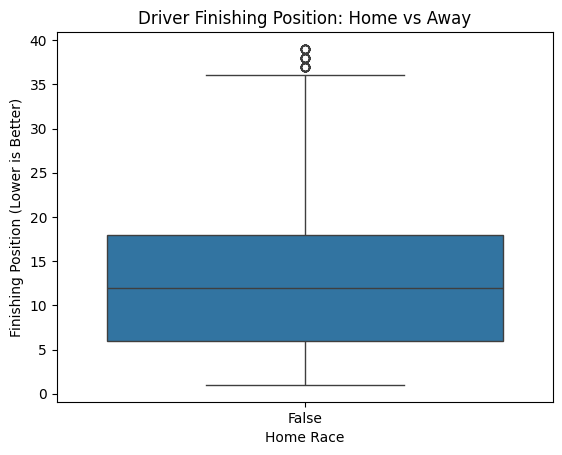

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x='home_race', y='positionOrder', data=merged)
plt.title('Driver Finishing Position: Home vs Away')
plt.xlabel('Home Race')
plt.ylabel('Finishing Position (Lower is Better)')
plt.show()